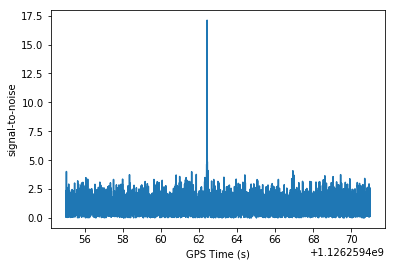

In [3]:
# URL: 'https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.gwf
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, matched_filter
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from urllib import urlretrieve

# Read data and remove low frequency content
fname = 'H-H1_GWOSC_4KHZ_R1-1126259447-32.gwf'
url = 'https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/' + fname
urlretrieve(url, filename=fname) #Download GW data file
h1 = read_frame('H-H1_GWOSC_4KHZ_R1-1126259447-32.gwf','H1:GWOSC-4KHZ_R1_STRAIN') #Read the file
h1 = highpass_fir(h1, 15, 8) #High pass filter. 15 = cutoff frequency, 8 = order

psd = interpolate(welch(h1), 1.0 / h1.duration) # Calculate the noise spectrum


# Generate a template to filter with
hp, hc = get_fd_waveform(approximant="IMRPhenomD", mass1=35.6, mass2=30.6,
                         f_lower=15, delta_f=1.0/h1.duration)

hp.resize(len(h1) // 2 + 1) # Adjust data length

snr = matched_filter(hp, h1, psd=psd, low_frequency_cutoff=15.0) # Calculate the SNR

snr = snr[len(snr) // 4: len(snr) * 3 // 4] # Remove regions corrupted by filter wraparound

import pylab
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('signal-to-noise')
pylab.xlabel('GPS Time (s)')
pylab.show()

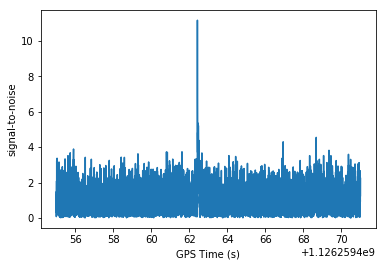

In [6]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, matched_filter
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from urllib import urlretrieve

# Download data and remove low frequency content
fname = 'H-H1_GWOSC_4KHZ_R1-1126259447-32.gwf'
url = 'https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/' + fname
urlretrieve(url, filename=fname)
h1 = read_frame('H-H1_GWOSC_4KHZ_R1-1126259447-32.gwf','H1:GWOSC-4KHZ_R1_STRAIN')
h1 = highpass_fir(h1, 15, 8)

# Calculate the noise spectrum
psd = interpolate(welch(h1), 1.0 / h1.duration)

# Generate a template to filter with
hp, hc = get_fd_waveform(approximant="IMRPhenomD", mass1=30, mass2=15,
                         f_lower=20, delta_f=1.0/h1.duration)
hp.resize(len(h1) // 2 + 1)

# Calculate the complex (two-phase SNR)
snr = matched_filter(hp, h1, psd=psd, low_frequency_cutoff=20.0)

# Remove regions corrupted by filter wraparound
snr = snr[len(snr) // 4: len(snr) * 3 // 4]

import pylab
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('signal-to-noise')
pylab.xlabel('GPS Time (s)')
pylab.show()